# TEST II: Campaign data analysis

    - Put your name in the file_name ( 5 points deduction if you miss it) 

    - 100 points

    - due by today's midnight

----
    - You need to download three files (this notebook and two data files)
    - For students registered for CSC 530, Please finish all the questions.
    - For others, the last question zip_code is optional (10 points are given).



## DATA: 2011-2012 Contributions by individuals
    The individual contributions file contains each contribution from an individual to a federal committee. It includes the ID number of the committee receiving the contribution, the name, city, state, zip code, and place of business of the contributor along with the date and amount of the contribution.
  
  
    data was download from the website: 
    https://www.fec.gov/data/browse-data/?tab=bulk-data
      

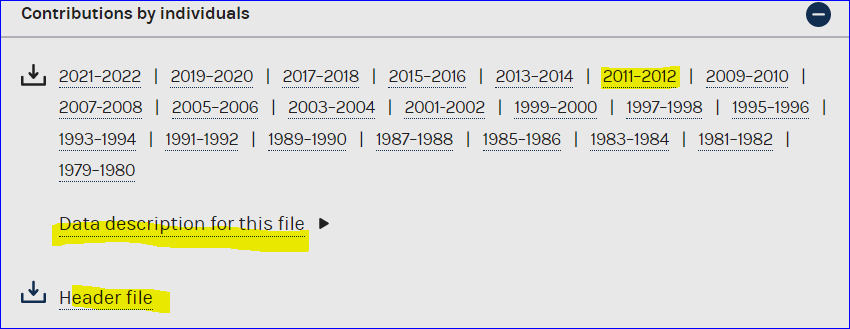
    
    The data description can be found: 
    https://www.fec.gov/campaign-finance-data/contributions-individuals-file-description/

    For this exam, only partial data is given. You can download it from the blackboard. The file name is "Individual_Contribution_2012.csv"


## 0:  Load and view data(15%)
     - Please download the data file "Individual_Contribution_2012.csv" and save it to your local disk
      
    - For your reference: 
     Because the dataset has 3 plus million records, you can use:
<code> df.sample(n=100_000, random_state=1)</code> 

    to sample 100k records for debugging purpose if your computer is slow. Eventually, you need to run your entire notebook using the full dataset.


In [980]:
# import the libraries. You need more libararies, add here
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np  
import datetime




#  [ 2 points] 0.1 Read in file named "Individual_Contribution_2012.csv" and 
# assign the dataset to a dataframe named df, then display the first 5 rows

#  -------- < Your code starts here > -----------

df=pd.read_csv("Individual_Contribution_2012.csv")

df.head()





#---------------------------------------------------------------------------
# You will get warning about the Columns (10). We will take care of it later

C:\Users\12403\AppData\Local\Temp\ipykernel_15400\4015522024.py:15: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("Individual_Contribution_2012.csv")


,CMTE_ID,AMNDT_IND,RPT_TP,TRANSACTION_PGI,IMAGE_NUM,TRANSACTION_TP,ENTITY_TP,NAME,CITY,STATE,ZIP_CODE,EMPLOYER,OCCUPATION,TRANSACTION_DT,TRANSACTION_AMT
0,C00425645,N,M2,NaN,11930332238,15,IND,"MYERS, WALTER",TUSTIN RANCH,CA,92782,MICROSOFT,CONSULTANT,1192011.0,250
1,C00377051,N,M2,NaN,11930332597,15,IND,"ORROCK, MICHELLE",ELK GROVE,CA,95624,C & M INSURANCE,INSURANCE AGENT,1102011.0,350
2,C00377051,N,M2,NaN,11930332597,15,IND,"SCHACHTERLE, DIANE",CARMICHAEL,CA,95608,ACRI,DIRECTOR OF POLICY,1102011.0,300
3,C00487447,N,M2,NaN,11930332701,15,IND,"CLEVENGER, DON JEFFERY",SUNNYVALE,TX,75182,ONCOR ELECTRIC DELIVERY,SR VICE PRESIDENT,1312011.0,283
4,C00487447,N,M2,NaN,11930332701,15,IND,"GREER, JAMES ALAN",ROANOKE,TX,76262,ONCOR ELECTRIC DELIVERY,SR VICE PRESIDENT,1312011.0,250


In [981]:
df['TRANSACTION_DT'] = pd.to_datetime(df['TRANSACTION_DT'], format='%m%d%Y') 

In [982]:
df["year"] = df.TRANSACTION_DT.dt.year

In [983]:
df.head()

,CMTE_ID,AMNDT_IND,RPT_TP,TRANSACTION_PGI,IMAGE_NUM,TRANSACTION_TP,ENTITY_TP,NAME,CITY,STATE,ZIP_CODE,EMPLOYER,OCCUPATION,TRANSACTION_DT,TRANSACTION_AMT,year
0,C00425645,N,M2,NaN,11930332238,15,IND,"MYERS, WALTER",TUSTIN RANCH,CA,92782,MICROSOFT,CONSULTANT,2011-11-09,250,2011.0
1,C00377051,N,M2,NaN,11930332597,15,IND,"ORROCK, MICHELLE",ELK GROVE,CA,95624,C & M INSURANCE,INSURANCE AGENT,2011-01-10,350,2011.0
2,C00377051,N,M2,NaN,11930332597,15,IND,"SCHACHTERLE, DIANE",CARMICHAEL,CA,95608,ACRI,DIRECTOR OF POLICY,2011-01-10,300,2011.0
3,C00487447,N,M2,NaN,11930332701,15,IND,"CLEVENGER, DON JEFFERY",SUNNYVALE,TX,75182,ONCOR ELECTRIC DELIVERY,SR VICE PRESIDENT,2011-01-31,283,2011.0
4,C00487447,N,M2,NaN,11930332701,15,IND,"GREER, JAMES ALAN",ROANOKE,TX,76262,ONCOR ELECTRIC DELIVERY,SR VICE PRESIDENT,2011-01-31,250,2011.0


In [984]:
df.dtypes

CMTE_ID                    object
AMNDT_IND                  object
RPT_TP                     object
TRANSACTION_PGI            object
IMAGE_NUM                   int64
TRANSACTION_TP             object
ENTITY_TP                  object
NAME                       object
CITY                       object
STATE                      object
ZIP_CODE                   object
EMPLOYER                   object
OCCUPATION                 object
TRANSACTION_DT     datetime64[ns]
TRANSACTION_AMT             int64
year                      float64
dtype: object

In [985]:
# [1 points] 0.2 Check the shape of dataframe df: (3372139, 15)

df.shape




(3372139, 16)

In [986]:
# [2 points] 0.3 Check the df info 

df.info()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3372139 entries, 0 to 3372138
Data columns (total 16 columns):
 #   Column           Dtype         
---  ------           -----         
 0   CMTE_ID          object        
 1   AMNDT_IND        object        
 2   RPT_TP           object        
 3   TRANSACTION_PGI  object        
 4   IMAGE_NUM        int64         
 5   TRANSACTION_TP   object        
 6   ENTITY_TP        object        
 7   NAME             object        
 8   CITY             object        
 9   STATE            object        
 10  ZIP_CODE         object        
 11  EMPLOYER         object        
 12  OCCUPATION       object        
 13  TRANSACTION_DT   datetime64[ns]
 14  TRANSACTION_AMT  int64         
 15  year             float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(12)
memory usage: 411.6+ MB


In [987]:
# [2 points] 0.4 List ONLY the column names of the df

df.keys()



Index(['CMTE_ID', 'AMNDT_IND', 'RPT_TP', 'TRANSACTION_PGI', 'IMAGE_NUM',
       'TRANSACTION_TP', 'ENTITY_TP', 'NAME', 'CITY', 'STATE', 'ZIP_CODE',
       'EMPLOYER', 'OCCUPATION', 'TRANSACTION_DT', 'TRANSACTION_AMT', 'year'],
      dtype='object')

In [988]:
# [2 points] 0.5 List ONLY the numeric column names in the df

num_col = df.select_dtypes(np.number)
num_col.keys()



Index(['IMAGE_NUM', 'TRANSACTION_AMT', 'year'], dtype='object')

In [989]:
# [2 points] 0.6 Display ONLY the last 10 indices of the df.


df.tail(10)



,CMTE_ID,AMNDT_IND,RPT_TP,TRANSACTION_PGI,IMAGE_NUM,TRANSACTION_TP,ENTITY_TP,NAME,CITY,STATE,ZIP_CODE,EMPLOYER,OCCUPATION,TRANSACTION_DT,TRANSACTION_AMT,year
3372129,C00521641,N,YE,G,13031002062,15,IND,AIKERMAN^ JAMES,WAKEFIELD,RI,2880.0,NaN,NaN,2012-09-24,250,2012.0
3372130,C00521641,N,YE,G,13031002062,15,IND,"SHARPE, HENRY D III",SAUNDERSTOWN,RI,2874.0,NaN,NaN,2012-10-21,500,2012.0
3372131,C00521641,N,YE,G,13031002063,15,IND,"HINDLEY, PHILIP C",SOUTH KINGSTON,RI,2879.0,NaN,NaN,2012-10-23,500,2012.0
3372132,C00521641,N,YE,G,13031002063,15,IND,"DANFORTH, MURRAY",PROVIDENCE,RI,2906.0,NaN,NaN,2012-10-04,250,2012.0
3372133,C00521641,N,YE,G,13031002064,15,IND,"SACHER, MARK",PROVIDENCE,RI,2906.0,NaN,NaN,2012-10-17,250,2012.0
3372134,C00521641,N,YE,G,13031002064,15,IND,"HEFLER, JOHN",CHARLESTOWN,RI,2813.0,NaN,NaN,2012-10-19,2500,2012.0
3372135,C00521641,N,YE,G,13031002062,15,IND,AIKERMAN^ KARIN,WAKEFIELD,RI,2880.0,NaN,NaN,2012-09-24,250,2012.0
3372136,C00504589,T,YE,NaN,13031040444,15C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011-10-23,19558,2011.0
3372137,C00521641,N,YE,G,13031002063,15,IND,"SACHER, MARK",PROVIDENCE,RI,2906.0,NaN,NaN,2012-11-02,200,2012.0
3372138,C00513150,N,YE,NaN,13031052225,10,IND,"SCHMIDT, SARAH",WILMETTE,IL,60091.0,SELF,CONSULTANT,2012-10-13,500,2012.0


In [990]:
# [2 points] 0.7 Describe the df using include=[np.number]

df1=df.describe(include=np.number)

df1

,IMAGE_NUM,TRANSACTION_AMT,year
count,3.372139e+06,3.372139e+06,3.371669e+06
mean,1.537991e+15,1.194810e+03,2.011709e+03
std,1.754580e+16,1.969469e+04,4.556248e-01
min,1.102004e+10,-7.500000e+05,2.000000e+03
25%,1.294077e+10,2.500000e+02,2.011000e+03
50%,1.297003e+10,4.000000e+02,2.012000e+03
75%,1.394304e+10,1.000000e+03,2.012000e+03
max,2.021041e+17,1.000000e+07,2.023000e+03


In [991]:
# [2 points] 0.8 Describe the df using  include=['object']
df2=df.describe(include=['object'])
df2

,CMTE_ID,AMNDT_IND,RPT_TP,TRANSACTION_PGI,TRANSACTION_TP,ENTITY_TP,NAME,CITY,STATE,ZIP_CODE,EMPLOYER,OCCUPATION
count,3372139,3372139,3372139,2428919,3372139,3370671,3371988,3369957,3363472,3361981.0,3021238,3186544
unique,7120,3,26,97,11,7,1539807,27747,68,113702.0,658672,145806
top,C00431445,A,Q3,P2012,15,IND,"KARGER, FRED",NEW YORK,CA,10024.0,RETIRED,RETIRED
freq,436825,2261741,476182,1109471,3022877,3346487,1514,116005,444697,6217.0,351675,566350


## 1. Data selection  and missing values(10%)


In [992]:
# [2 points] 1.1 data selection
#  drop columns 0-6 or keep columns 7-14 (both are inclusive), use name df_1 for the selected data.
# then display df_1' last 10 rows 
   
df_1 = df.iloc[:, [7,8,9,10,11,12,13,14]]
df_1.tail(10) 
    
    

,NAME,CITY,STATE,ZIP_CODE,EMPLOYER,OCCUPATION,TRANSACTION_DT,TRANSACTION_AMT
3372129,AIKERMAN^ JAMES,WAKEFIELD,RI,2880.0,NaN,NaN,2012-09-24,250
3372130,"SHARPE, HENRY D III",SAUNDERSTOWN,RI,2874.0,NaN,NaN,2012-10-21,500
3372131,"HINDLEY, PHILIP C",SOUTH KINGSTON,RI,2879.0,NaN,NaN,2012-10-23,500
3372132,"DANFORTH, MURRAY",PROVIDENCE,RI,2906.0,NaN,NaN,2012-10-04,250
3372133,"SACHER, MARK",PROVIDENCE,RI,2906.0,NaN,NaN,2012-10-17,250
3372134,"HEFLER, JOHN",CHARLESTOWN,RI,2813.0,NaN,NaN,2012-10-19,2500
3372135,AIKERMAN^ KARIN,WAKEFIELD,RI,2880.0,NaN,NaN,2012-09-24,250
3372136,NaN,NaN,NaN,NaN,NaN,NaN,2011-10-23,19558
3372137,"SACHER, MARK",PROVIDENCE,RI,2906.0,NaN,NaN,2012-11-02,200
3372138,"SCHMIDT, SARAH",WILMETTE,IL,60091.0,SELF,CONSULTANT,2012-10-13,500


In [993]:
# [2 points] 1.2  Dispay how many missing values in each column in the df_1
# also display the total number of missing data ( the # of all missing data cells)

print(df_1.isnull().sum())
print("\nTotal Number of missing cells:",df_1.isnull().sum().sum())


NAME                  151
CITY                 2182
STATE                8667
ZIP_CODE            10158
EMPLOYER           350901
OCCUPATION         185595
TRANSACTION_DT        470
TRANSACTION_AMT         0
dtype: int64

Total Number of missing cells: 558124


In [994]:
# [2 points] 1.3 Find out how many rows which have one or more missing value(s) in df_1

df_miss=df_1[df_1.isna().any(axis=1)]


print("Number of one or more missing rows:",df_miss.shape[0])




Number of one or more missing rows: 366869


In [995]:
# [2 points] 1.4  Find out how many rows which are empty (all are missing) in df_1

df_miss_r=df_1[df_1.isna().all(axis=1)]
print("Number of all missing rows:",df_miss_r.shape[0])



Number of all missing rows: 0


In [996]:
# [2 points] 1.5  Find out how many rows that they are duplicated in df_1

print(df_1.duplicated().sum())



109063


## 2. Statistics and Plotting (20%)
     - In this section, we use df_1 and work on the column "TRANSACATION_AMT" only


In [997]:
# [3 points] 2.1 For the column "TRANSACATION_AMT" in df_1:   

# Find 'max', 'min', 'mean', 'std'  and print them out using aggregation() or agg() 
df_trn_amt=df_1.TRANSACTION_AMT
df_trn_amt.agg([np.max,np.min,np.mean, np.std])


amax    1.000000e+07
amin   -7.500000e+05
mean    1.194810e+03
std     1.969469e+04
Name: TRANSACTION_AMT, dtype: float64

In [998]:
# [3 points] 2.2 For column "TRANSACATION_AMT" in df_1, we notice that there are some data with negative amounts  
# assuming they are refund (I guess) 
 
df_t=pd.DataFrame(df["TRANSACTION_AMT"])
# (a) print out the number of rows which are negative 
print("Number of negative rows:",(df_t < 0).sum().sum())

# (b) there are aslo some rows with zero amount, print out the number of rows with amount zero.

print("Number of zero`s rows:",(df_t == 0).sum().sum())

# (c) Also find how many donations which are positive 
print("Number of positive rows:",(df_t > 0).sum().sum())

Number of negative rows: 23713
Number of zero`s rows: 336
Number of positive rows: 3348090


In [999]:
# [2 points] 2.3 For column "TRANSACATION_AMT" in df_1

# (a) print out the total dollar amount of all negative values 
print(df_t[(df_t.TRANSACTION_AMT < 0)].sum())


# (b) Also find out the total dollar amount of all positive values

print(df_t[(df_t.TRANSACTION_AMT > 0)].sum())



TRANSACTION_AMT   -50638172
dtype: int64
TRANSACTION_AMT    4079703499
dtype: int64


array([[<AxesSubplot:title={'center':'TRANSACTION_AMT'}>]], dtype=object)

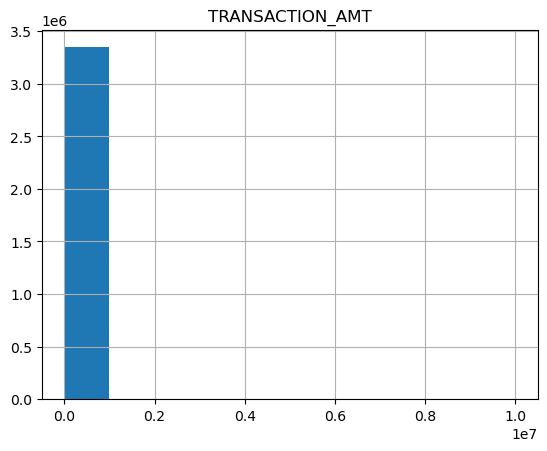

In [1000]:
# [2 points] 2.4 Plot the histgram using only positive transactions
dfs=df_t[(df_t.TRANSACTION_AMT > 0)]

dfs.hist()





In [1001]:
# [2 points] 2.5 The graphs above looks not good because some transactions are big numbers. 

# what is the ratio for the total transaction amount higher than $1K to all positive transaction amount? 
df_s1=df_t[(df_t.TRANSACTION_AMT > 1000)].sum()
print(df_s1)
df_s2=df_t[(df_t.TRANSACTION_AMT > 0)].sum()
print(df_s2)
ratio=df_s1/df_s2
print("Ratio:",ratio)

TRANSACTION_AMT    2855668984
dtype: int64
TRANSACTION_AMT    4079703499
dtype: int64
Ratio: TRANSACTION_AMT    0.69997
dtype: float64


array([[<AxesSubplot:title={'center':'TRANSACTION_AMT'}>]], dtype=object)

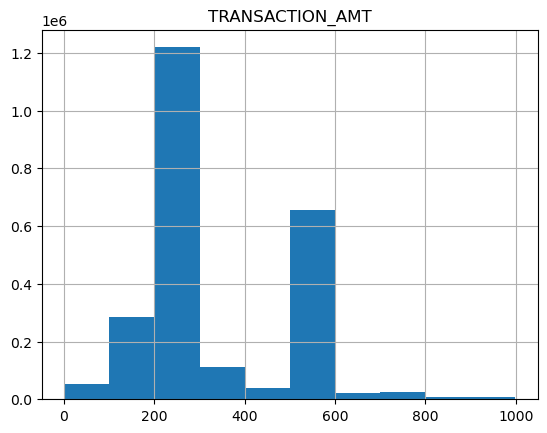

In [1002]:
# [2 points] 2.6 Plot again the histgram using the amount in between 0 to 1,000 (both exclusive)

dfs=df_t[(df_t.TRANSACTION_AMT > 0) & (df_t.TRANSACTION_AMT < 1000) ]

dfs.hist()



array([[<AxesSubplot:title={'center':'TRANSACTION_AMT'}>]], dtype=object)

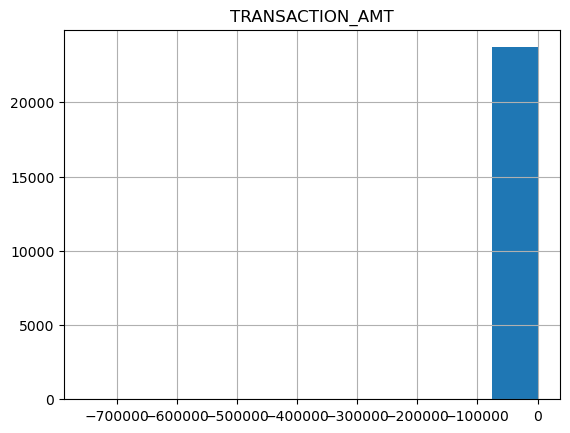

In [1003]:
# [2 points] 2.7 Plot the histgram using only negative transaction amounts

dfs=df_t[(df_t.TRANSACTION_AMT < 0)]

dfs.hist()




In [1004]:
# [2 points] 2.8 The graphs above looks not good either because some transactions are big negative numbers. 

# what is the ratio for the total amount lower than -5000 to all negative transaction amount? 

df_n_s1=df_t[(df_t.TRANSACTION_AMT < -5000)].sum()
print(df_n_s1)
df_n_s2=df_t[(df_t.TRANSACTION_AMT < 0)].sum()
print(df_n_s2)
ratio=df_n_s1/df_n_s2
print("Ratio:",ratio)




TRANSACTION_AMT   -10287838
dtype: int64
TRANSACTION_AMT   -50638172
dtype: int64
Ratio: TRANSACTION_AMT    0.203164
dtype: float64


In [1005]:
df_n=df_t[(df_t.TRANSACTION_AMT < -5000)]
df_n.cumsum(axis = 0)

,TRANSACTION_AMT
576,-15200
24743,-20400
40946,-30400
40949,-40400
40950,-50400
...,...
3243035,-10236938
3285427,-10246938
3294737,-10252038
3364381,-10262038


array([[<AxesSubplot:title={'center':'TRANSACTION_AMT'}>]], dtype=object)

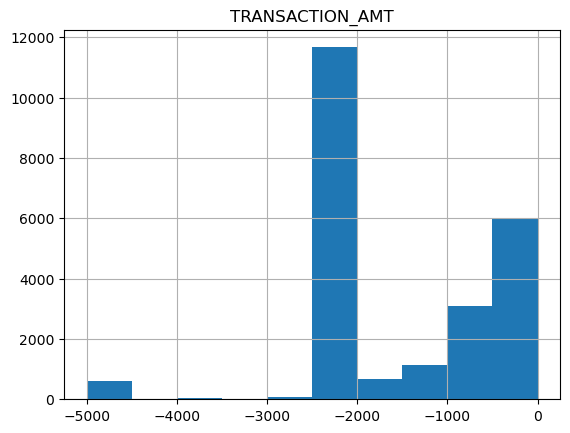

In [1006]:
# [2 points] 2.9 Plot the histgram using only negative transactions between -5000(inclusive) to 0 (exclusive)


dfs_n=df_t[(df_t.TRANSACTION_AMT >= -5000) & (df_t.TRANSACTION_AMT < 0) ]

dfs_n.hist()



## 3. Column TRANSACTION_AMT: group_by NAME and sort_values(10%)        

In [1007]:
# [2 points] 3.1 Start from df_1, select two columns: "NAME" and "TRANSACTION_AMT" columns, then name the subset data as df_2

df_2=df_1[["NAME","TRANSACTION_AMT"]]


# Display df_2.head()
df_2.head()




,NAME,TRANSACTION_AMT
0,"MYERS, WALTER",250
1,"ORROCK, MICHELLE",350
2,"SCHACHTERLE, DIANE",300
3,"CLEVENGER, DON JEFFERY",283
4,"GREER, JAMES ALAN",250


In [1008]:
# [2 points] 3.2 Find and display the df_2's top 10 highest amounts in term of  "TRANSACTION_AMT"

df_2=df_2.sort_values(by='TRANSACTION_AMT',ascending=False)
df_2.TRANSACTION_AMT.head(10)



3004614    10000000
2052358     7674142
2052357     7674141
1664363     5486382
1741096     5139481
2294684     5000000
3366747     5000000
2294676     5000000
2294286     5000000
2294285     5000000
Name: TRANSACTION_AMT, dtype: int64

In [1009]:
# Some people might have more than one transactions: ASSUME THE SAME NAME IS THE SAME PERSON HERE

# [3 points] 3.3 For each name, find out its total amounts of all transactions 
# Then display the top 20 highest total amounts of transactions along with each name in descending order.
group_name = df_2[['NAME', 'TRANSACTION_AMT']].groupby('NAME')

name=group_name.sum()

name=name.sort_values(by='TRANSACTION_AMT',ascending=False)
name.head(10)

,TRANSACTION_AMT
NAME,
"ADELSON, SHELDON",35395500
"ADELSON, MIRIAM DR.",33097700
"DEWHURST, DAVID",27128904
"SIMMONS, HAROLD C.",22828500
"SMITH, THOMAS",16621084
"MCMAHON, LINDA",15870281
AMERICANS FOR TAX REFORM (GENERAL,15348283
"BLOOMBERG, MICHAEL R.",13630473
"ADELSON, MIRIAM",13396500


<AxesSubplot:xlabel='NAME'>

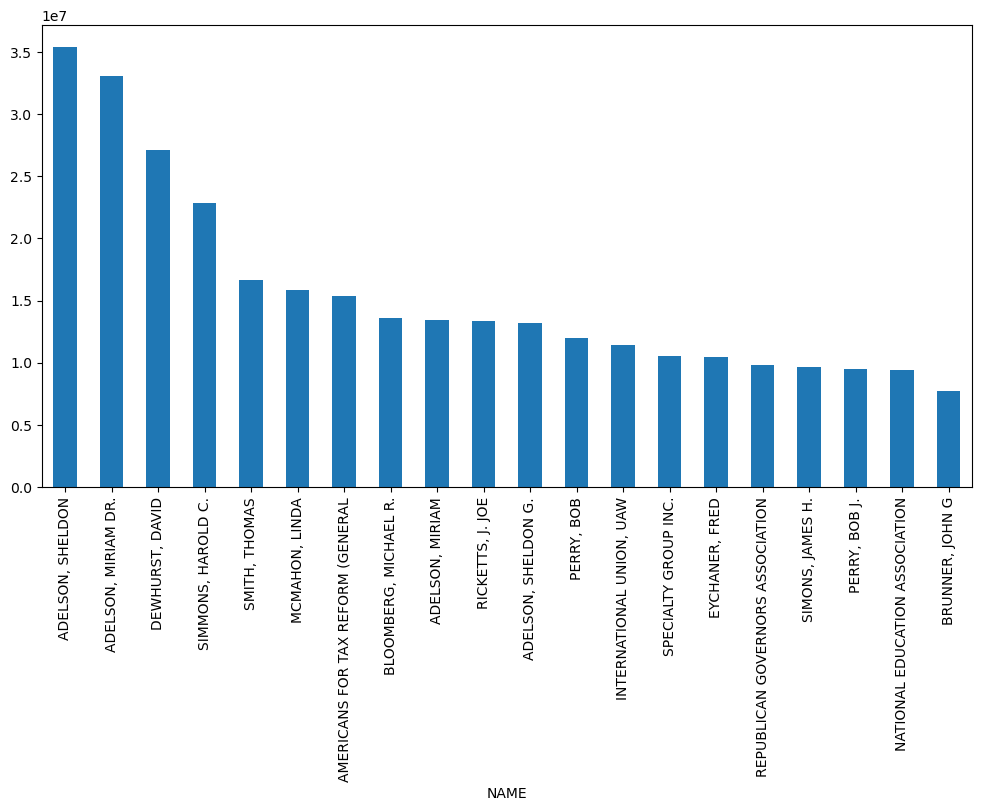

In [1010]:
# [3 points] 3.4  Plot bar chart of TRANSACTION__AMT for the top 20 people using figsize = [12, 6] 

plot_bar=name[0:20]
plot_bar['TRANSACTION_AMT'].plot(kind='bar',x='Name',figsize = (12, 6) )




## 4. Column STATE:  dataframe pd.merge or df.join() (15%)¶

In [1011]:
# [4 points] 4.1 Start from df_1, group_by "STATE" then find the total amounts of transactions (use groupby().sum() ) 
# we will have the dataframe holding each state and its total amount,  name it as df_3

df_3 = df_1.groupby('STATE').sum()

df_3

# display how many states

df_3.shape[0]



68

In [1012]:
df_3

,TRANSACTION_AMT
STATE,
AA,500
AB,416
AE,15002
AK,5088702
AL,24055855
...,...
WI,44402174
WV,11725354
WY,25708381


In [1013]:
## [0 points]  CODE GIVEN ##

# df_3 above shows that there are 68 STATES (some are not among the US 50 states or DC.)

# WE read in US code_2 (file name: states_code2.csv) first, it can be used to get the data within the 50 States plus DC:
df_code2 = pd.read_csv("states_code2.csv", usecols=[1, 2], index_col = 1) 
df_code2.index.name="STATE"


print("All US states:", len(df_code2))
df_code2.head()

All US states: 51


,State
STATE,
AL,Alabama
AK,Alaska
AZ,Arizona
AR,Arkansas
CA,California


In [1014]:
# [4 points] 4.2 Now use both df_code2 and df_3 to generate a dataframe df_4 which holds only 51 US states' data 
# (hint use join or merge) 

df_4 = pd.merge(df_3, df_code2, on='STATE', how='inner')

# diplay df_4  


df_4


,TRANSACTION_AMT,State
STATE,,
AK,5088702,Alaska
AL,24055855,Alabama
AR,19026913,Arkansas
AZ,59985444,Arizona
CA,526436531,California
CO,67705799,Colorado
CT,100347351,Connecticut
DC,205236017,District of Columbia
DE,7060319,Delaware


<AxesSubplot:xlabel='STATE'>

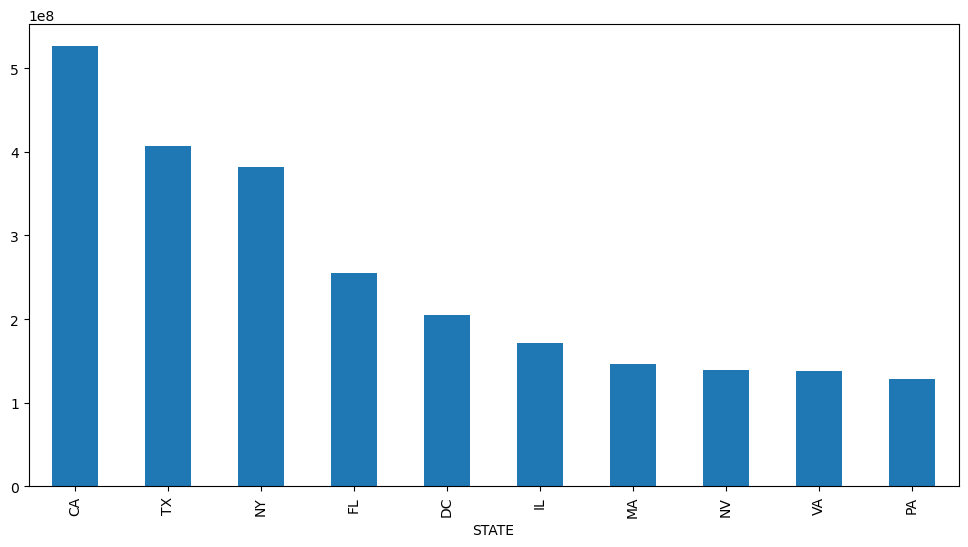

In [1015]:
# [3 points] 4.3 bar-plot the top 10 US states in term of TRANSACTION_AMT
 
trn=df_4.sort_values(by='TRANSACTION_AMT',ascending=False)
plot_bar2=trn[0:10]
plot_bar2['TRANSACTION_AMT'].plot(kind='bar',x='STATE',figsize = (12, 6) )  
    
    

In [1016]:
# [4 points] 4.4 find all other states which are not in the 51 states, named as df_5, print out state name

df_5=df_3[~df_3.isin(df_4)].dropna()

# print df_5
df_5

,TRANSACTION_AMT
STATE,
AA,500.0
AB,416.0
AE,15002.0
AP,500.0
AS,33200.0
BC,3995.0
FR,1000.0
FS,2506.0
GB,200.0


In [1017]:
df_1.head()

,NAME,CITY,STATE,ZIP_CODE,EMPLOYER,OCCUPATION,TRANSACTION_DT,TRANSACTION_AMT
0,"MYERS, WALTER",TUSTIN RANCH,CA,92782,MICROSOFT,CONSULTANT,2011-11-09,250
1,"ORROCK, MICHELLE",ELK GROVE,CA,95624,C & M INSURANCE,INSURANCE AGENT,2011-01-10,350
2,"SCHACHTERLE, DIANE",CARMICHAEL,CA,95608,ACRI,DIRECTOR OF POLICY,2011-01-10,300
3,"CLEVENGER, DON JEFFERY",SUNNYVALE,TX,75182,ONCOR ELECTRIC DELIVERY,SR VICE PRESIDENT,2011-01-31,283
4,"GREER, JAMES ALAN",ROANOKE,TX,76262,ONCOR ELECTRIC DELIVERY,SR VICE PRESIDENT,2011-01-31,250


In [1018]:
#df['TRANSACTION_DT'] = pd.to_datetime(df['TRANSACTION_DT'], format='%m%d%Y') 
#df["year"] = df.TRANSACTION_DT.dt.year

## 5 Boolean indexing (conditional selection)(20%)

In [1019]:
# [4 points] 5.1  Start with df_1 again.  
# (Assuming that transactions with the same NAME, CITY, STATE and ZIP_CODE were made by the same person. ) 


# (a) Find out those people who made two or more transactions in 2011-2012, name it df_6. 
# Print out the last 10 rows (hint: check the NAME, CITY, STATE, and ZIP_CODE if they are duplicated() ).
df_1['Year']=df_1.TRANSACTION_DT.dt.year
df_x = df_1[ (df_1['Year'] == 2011) | (df_1['Year'] == 2012)]

df_6 = df_x[df_1.duplicated(subset=['NAME','CITY','STATE','ZIP_CODE'],keep=False)]

display(df_6.head())

print("Duplicated rows:",df_6.shape[0])

# (b) Using df_6, find out/print out the total number of all unique NAMES

print("Unique number of names:",df_6['NAME'].nunique())
print("Unique number of Year:",df_6['Year'].nunique())



# (c) There are some rows missing all NAME/CITY/STATE/ZIP_CODE.  
# Find out how many times of transactions missing all columns (NAME, CITY, STATE and ZIP_CODE )  

df_6[['NAME','CITY','STATE','ZIP_CODE']].isnull().all(axis=1).sum().sum()




C:\Users\12403\AppData\Local\Temp\ipykernel_15400\1461692970.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['Year']=df_1.TRANSACTION_DT.dt.year
C:\Users\12403\AppData\Local\Temp\ipykernel_15400\1461692970.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_6 = df_x[df_1.duplicated(subset=['NAME','CITY','STATE','ZIP_CODE'],keep=False)]


,NAME,CITY,STATE,ZIP_CODE,EMPLOYER,OCCUPATION,TRANSACTION_DT,TRANSACTION_AMT,Year
1,"ORROCK, MICHELLE",ELK GROVE,CA,95624,C & M INSURANCE,INSURANCE AGENT,2011-01-10,350,2011.0
3,"CLEVENGER, DON JEFFERY",SUNNYVALE,TX,75182,ONCOR ELECTRIC DELIVERY,SR VICE PRESIDENT,2011-01-31,283,2011.0
4,"GREER, JAMES ALAN",ROANOKE,TX,76262,ONCOR ELECTRIC DELIVERY,SR VICE PRESIDENT,2011-01-31,250,2011.0
5,"JACKSON, BRENDA LOUISE",DALLAS,TX,75206,ONCOR ELECTRIC DELIVERY,SR VICE PRESIDENT & CCO,2011-01-31,215,2011.0
6,"DAVIS, DAVID M",MIDLOTHIAN,TX,76065,ONCOR ELECTRIC DELIVERY,SR VICE PRESIDENT,2011-01-31,291,2011.0


Duplicated rows: 1786684
Unique number of names: 445558
Unique number of Year: 2


126

In [1020]:
df_6['Year'].value_counts()

2012.0    1229321
2011.0     557363
Name: Year, dtype: int64

In [1021]:
# [4 points] 5.2 Using df_6, Find/print out how many times of transactions made by each NAME/CITY/STATE/ZIP_CODE 
# (hint use .value_counts() or groupby())
print("Name")
print(df_6['NAME'].value_counts().sum())
print("\nZIP_CODE")
print(df_6['ZIP_CODE'].value_counts().sum())
print("\nCITY")
print(df_6['CITY'].value_counts().sum())
print("\nSTATE")
print(df_6['STATE'].value_counts().sum())


# Not correct if checking with name only
          

Name
1786558

ZIP_CODE
1781478

CITY
1786181

STATE
1782770


In [1029]:
# [4 points] 5.3 Start with df_1 again. Find out those people who made only one transaction in 2011-2012, name it df_7
# (hint: use ~ to check not duplicated in the NAME/CITY/STATE/ZIP_CODE  )
df_x = df_1[ (df_1['Year'] == 2011) | (df_1['Year'] == 2012)]

df_7 = df_x[~df_1.duplicated(subset=['NAME','CITY','STATE','ZIP_CODE'],keep=False)]

display(df_7["NAME"])

# print out the total number of such rows  

df_7.shape[0]


C:\Users\12403\AppData\Local\Temp\ipykernel_15400\3894580196.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_7 = df_x[~df_1.duplicated(subset=['NAME','CITY','STATE','ZIP_CODE'],keep=False)]


0                  MYERS, WALTER
2             SCHACHTERLE, DIANE
8             ELBERGER, ROBERT M
9               GOFORTH, MYRON E
10         CHAUMETTE, JACQUELINE
                   ...          
3372129          AIKERMAN^ JAMES
3372130      SHARPE, HENRY D III
3372131        HINDLEY, PHILIP C
3372134             HEFLER, JOHN
3372135          AIKERMAN^ KARIN
Name: NAME, Length: 1584237, dtype: object

1584237

In [1023]:
# [4 points] 5.4 Start from df_1 again, we work on NAME "BLOOMBERG, MICHAEL R." 

# (a) Find out how many transactions in df_1 using this name

print("Number of transactions:",df_1[df_1.NAME=="BLOOMBERG, MICHAEL R."].value_counts().sum())

# (b) Find out the total TRANSACTION_AMTs with the NAME "BLOOMBERG, MICHAEL R."
trns=df_1[df_1.NAME=="BLOOMBERG, MICHAEL R."]
trns["TRANSACTION_AMT"].sum()

Number of transactions: 12


13630473

#### For your reference:
  
TRANSACTION_DT: Transaction date (MMDDYYYY)  
      
      The data type of this column is floating point

    - Jan. 20, 2011 is recorded as 1202011.0
    - Nov. 29, 2012 is recorded as 11292012.0	
    

In [1024]:
# [4 points] 5.5 For NAME "BLOOMBERG, MICHAEL R.", TRANSACTION_DTs show that some made in 2011 and some in 2012


# (a) Find out the total amount of TRANSACTiON_AMTs made in 2011 

t_2011=df_1[(df_1.NAME=="BLOOMBERG, MICHAEL R.") & (df_1.Year==2011)]

print(t_2011['TRANSACTION_AMT'].sum())

# (b) Find out the total amount of TRANSACTION_AMTs made in 2012
t_2012=df_1[(df_1.NAME=="BLOOMBERG, MICHAEL R.") & (df_1.Year==2012)]
print(t_2012['TRANSACTION_AMT'].sum())




2870303
10760170


### for CSC 530 Students only (other student gets 10 points credit automatically)  



## 6. Column ZIP_CODE (10%) 
      -  ZIP_CODE: mixed types.
          * some values are missing 
          * some values are floating point 
          * some values are string type (with letters/space/special character) 
          * some values are shorter than 5 long 
          * some values are 5 long
          * some values are longer than 5 long



## You need to process ZIP CODE as follows:
    (1) fill in missing values with "99999"
    (2) convert floating a zip code to str type and remove ".0" if needed
    (3) if a zip code contains digits only:
        - if the string length  < 5,  assign it as "99999"
        - if the string length == 5,  keep it unchanged 
        - if the string length >  5,  keep only the first 5 digits
       otherwise (the zip code contains any non-digit such letter(s), space, and/or special character) 
          - assign it to "99999"
          
    (4) After conversion, display the column ZIP_CODE's:  
       (a) The total number of rows
       (b) The total number of "99999"s, and 
       (c) The first 10 rows of ZIP_CODE 
----      
    Hints:
        work only on the ZIP_CODE using dataframe or series
        map/function to your data series, or apply it to the dataframe above
        avoid using loop because looping will take too long to get outcomes.

In [1025]:
df.ZIP_CODE

0            92782
1            95624
2            95608
3            75182
4            76262
            ...   
3372134     2813.0
3372135     2880.0
3372136        NaN
3372137     2906.0
3372138    60091.0
Name: ZIP_CODE, Length: 3372139, dtype: object

In [1026]:
# zip code option 1: use map/function ----------- 
#  ---------- YOUR CODE  HERE -------------------
import math
zip_code=df.ZIP_CODE
df.isnull().sum()
df["ZIP_CODE"]=df["ZIP_CODE"].fillna(value='99999')
df['ZIP_CODE'] = df['ZIP_CODE'].astype(str)
df['ZIP_CODE']=df['ZIP_CODE'].replace(r'^\s*$', np.nan, regex=True)
df["ZIP_CODE"]=df["ZIP_CODE"].fillna(value='99999')
df["ZIP_CODE"]=df["ZIP_CODE"].apply(lambda x: x.split('.')[0])

display(df["ZIP_CODE"])
df["ZIP_CODE"]=df["ZIP_CODE"].apply(lambda x: '99999' if len(x)<5  else (x[0:5] if len(x)>5 else x))

display(df["ZIP_CODE"])
display(df["ZIP_CODE"].shape[0])
rows=df[df.ZIP_CODE=='99999']
display(rows.shape[0])
df["ZIP_CODE"].head(10)

0          92782
1          95624
2          95608
3          75182
4          76262
           ...  
3372134     2813
3372135     2880
3372136    99999
3372137     2906
3372138    60091
Name: ZIP_CODE, Length: 3372139, dtype: object

0          92782
1          95624
2          95608
3          75182
4          76262
           ...  
3372134    99999
3372135    99999
3372136    99999
3372137    99999
3372138    60091
Name: ZIP_CODE, Length: 3372139, dtype: object

3372139

298596

0    92782
1    95624
2    95608
3    75182
4    76262
5    75206
6    76065
7    75230
8    77019
9    77479
Name: ZIP_CODE, dtype: object

In [1027]:
# end 